#working notebook and notes for feature engineering
#url: https://github.com/malfaroe/feature-engineering-and-feature-selection.git
#About the feature engineering concept: https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a

#definiton: Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, 
resulting in improved model accuracy on unseen data. Feature engineering turn your inputs
into things the algorithm can understand.

PART 1: DATA EXPLORATION

In [911]:
#importing libraries...
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import os

plt.style.use("seaborn-colorblind")
%matplotlib inline



In [912]:
#reading the dataset titanic.csv
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, ) #usaremos usecols porque se quieren usar ciertas columnas del dataset

In [913]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [914]:
#get dtypes for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [915]:
#general description...
data.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


#UNIVARIATE ANALYSIS: definition: we pick up one feature and based on that one feature we try to determine what the output is.
In this case for example we could pick up Pclass and try to determine the Survived output


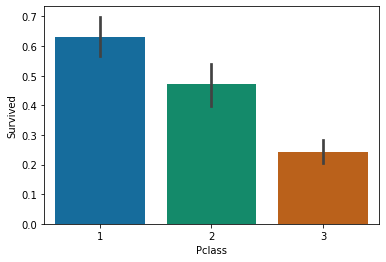

In [916]:
sns.barplot(x = "Pclass", y = "Survived", data = data) #indica la tendencia central (mean) de los datos
#barplot plots the relationship between a categorical and a numerical variable
#Several values per group? Don’t use a barplot. Even with error bars, it hides information and other type of graphic
#like boxplot or violin are much more appropriate.
#abajo: por cada clase cuanto fue el valor de sobrevivencia promedio

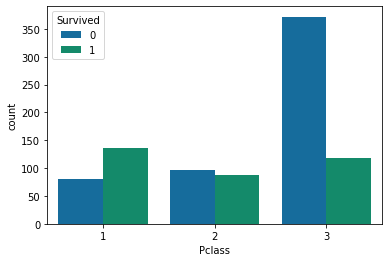

In [917]:
sns.countplot(x = "Pclass", hue = "Survived", data = data)

In [918]:
#countplot nos da un conteo de la frecuencia absoluta. En este caso sacamos el conteo de sobrev. por clase de pasaje

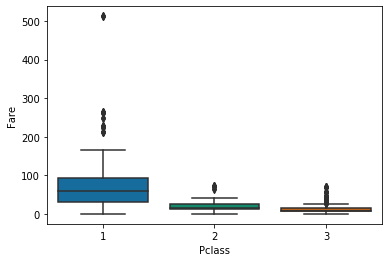

In [919]:
#discrete variable boxplot: podemos hacer un boxplot separando el comportamiento de una variable por tramos de otra
#por ejemplo: comportamiento de fare segun la clase
sns.boxplot(x = "Pclass", y = "Fare", data= data)

In [920]:
#podemos ver los indicadores de tendencia central y dispersion segun la clase del pasaje, visualizando tambien outliers

In [921]:
#Analisis de distrbucion vbariables continuas: histograma
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


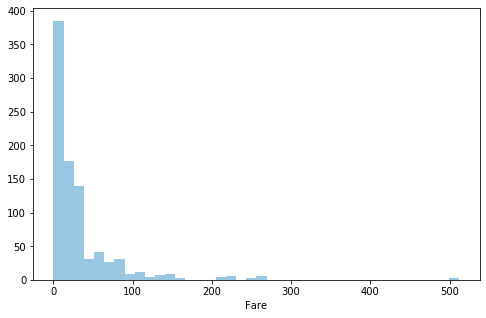

In [922]:
fig = plt.subplots(figsize = (8, 5))
sns.distplot(a = data["Fare"], bins= 40,kde = False )

In [923]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


#BIVARIATE ANALYSIS

In [924]:
#definition: is the descriptive statistics between two variables---

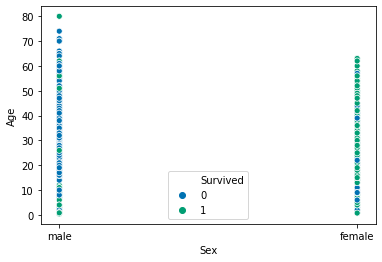

In [925]:
#B1: Scatterplot
sns.scatterplot(x= "Sex", y = "Age", hue = "Survived", data = data)

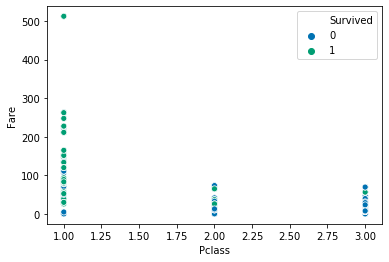

In [926]:
sns.scatterplot(x = "Pclass", y = "Fare", hue = "Survived", data = data)

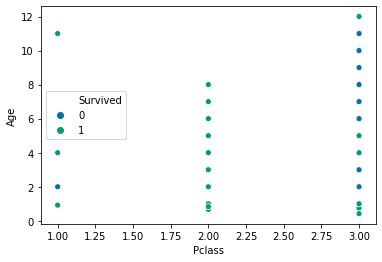

In [927]:
#edades de niños por clase 
sns.scatterplot(x = "Pclass", y = "Age", hue = "Survived", data = data[data["Age"] <13])

In [928]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


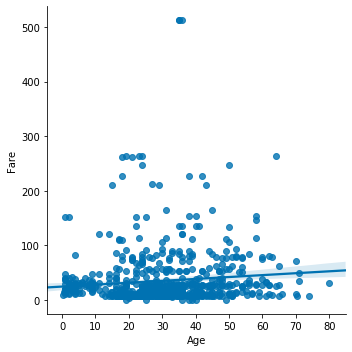

In [929]:
sns.lmplot(x = "Age", y = "Fare", data = data)

In [930]:
#B2: Correlation matrix...
data.corr()

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.159651
Fare,0.257307,-0.549500,0.096067,0.159651,1.000000


In [931]:
#B3: Heatmap
#usamos el dataset flights
flights = sns.load_dataset("flights") #loadas dataset from the online repository

In [932]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [933]:
#creo una tabla mas interesante: numero de pasajeros por mes y año con pivot table...

In [934]:
pivote = pd.pivot(data = flights, index= "year", columns= "month", values= "passengers")

In [935]:
pivote.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


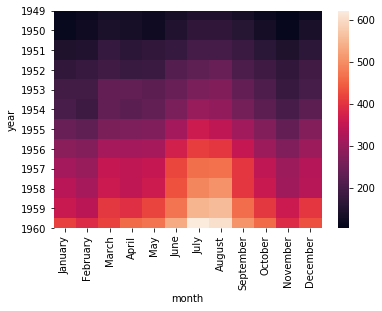

In [936]:
sns.heatmap(pivote)

####2. FEATURE CLEANING###

In [937]:
###2.1 Missing Values

In [938]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [939]:
#missing value checking...
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [940]:
#Método 1: listwise deletion (se borran los null)...

In [941]:
data_listwise = data.dropna()

In [942]:
data_listwise.shape

(714, 6)

In [943]:
#Metodo 2: Add another variable( column) to indicate if there is a NA

In [944]:
from numpy import nan
import math 
def new_col(col):
    for i in range(len(data["Age"])):
        if np.isnan(data["Age"][i]):
            col[i] = 1
        else:
            col[i] = 0
    return col 
            
        

In [945]:
data["Nan_check_age"] = data["Age"]
data["Nan_check_age"] = new_col(data["Nan_check_age"])

In [946]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.0,1,7.2500,0.0
1,1,1,female,38.0,1,71.2833,0.0
2,1,3,female,26.0,0,7.9250,0.0
3,1,1,female,35.0,1,53.1000,0.0
4,0,3,male,35.0,0,8.0500,0.0
5,0,3,male,NaN,0,8.4583,1.0
6,0,1,male,54.0,0,51.8625,0.0
7,0,3,male,2.0,3,21.0750,0.0
8,1,3,female,27.0,0,11.1333,0.0
9,1,2,female,14.0,1,30.0708,0.0


In [947]:
#Metodo 3: Fillna con arbitrary values
data_2 = data.copy()
data_2["Age"].fillna(value = -999,inplace = True)

In [948]:
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.0,1,7.2500,0.0
1,1,1,female,38.0,1,71.2833,0.0
2,1,3,female,26.0,0,7.9250,0.0
3,1,1,female,35.0,1,53.1000,0.0
4,0,3,male,35.0,0,8.0500,0.0


In [949]:
data_2.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Fare             0
Nan_check_age    0
dtype: int64

In [950]:
#Metodo 4: Fillna con mean, median, mode

In [951]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Fare             891 non-null float64
Nan_check_age    891 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


In [952]:
#ojo que Age es objeto, asi que hay que convertirlo a float
data_3 = data.copy()
mean_3 = pd.to_numeric(data_3["Age"], errors='coerce').mean() #se usa to_numeric para convertirlo a float
data_3["Age"].fillna(value = mean_3, inplace = True)
data_3["Age"].head(30)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
Name: Age, dtype: float64

In [953]:
#Metodo 4: replacing the NA by values that are at the far end of the distribution of that 
#variable calculated by mean + 3*std
data_4 = data.copy()
value_age = np.mean(data_4["Age"]) + 3 * np.std(data_4["Age"])
data_4["Age"].fillna(value = value_age, inplace = True )
data_4.head(10)



,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.000000,1,7.2500,0.0
1,1,1,female,38.000000,1,71.2833,0.0
2,1,3,female,26.000000,0,7.9250,0.0
3,1,1,female,35.000000,1,53.1000,0.0
4,0,3,male,35.000000,0,8.0500,0.0
5,0,3,male,73.248081,0,8.4583,1.0
6,0,1,male,54.000000,0,51.8625,0.0
7,0,3,male,2.000000,3,21.0750,0.0
8,1,3,female,27.000000,0,11.1333,0.0
9,1,2,female,14.000000,1,30.0708,0.0


In [954]:
#Metodo 5: Random imputation: replace the NaNs with values randomly picked from the available observations
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, )
data_5 = data.copy()
pick = list(data_5["Age"].dropna())

In [955]:
pick[:10]

[22.0, 38.0, 26.0, 35.0, 35.0, 54.0, 2.0, 27.0, 14.0, 4.0]

In [956]:
data.isnull().sum() 
 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [957]:
data_5 = data.copy()

In [958]:
data_5.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [959]:
data_5.fillna(value = "np.random(pick)", inplace = True)

In [960]:
data_5. isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [961]:
#2.2 Outliers!

In [962]:
#2.1 Outlier detection techniques...


In [963]:
# para trabajar nos quedamos con el dataset que reemplazo los NaN con mean()

In [964]:
data = data_3.copy()

In [965]:
data.describe()

,Survived,Pclass,Age,SibSp,Fare,Nan_check_age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.198653
std,0.486592,0.836071,13.002015,1.102743,49.693429,0.399210
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000


In [966]:
#de la naturaleza de las variables, solo cabe revisar Fare...

In [967]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

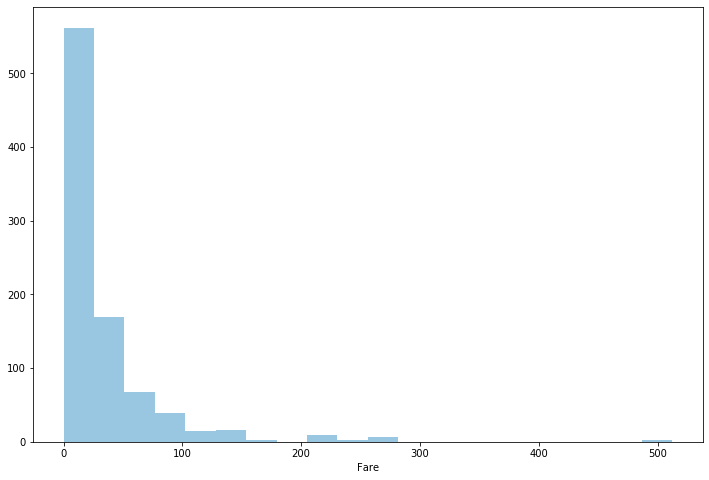

In [968]:
ax, fig = plt.subplots(figsize = (12, 8), )
sns.distplot(a = data["Fare"], bins = 20, kde= False )

In [969]:
#tenemos valores que se arrancan del histpgrama por lejos
#pero hay que ver a que pueden deberse...
#Ej: max
data[data["Fare"] > 150].sort_values(by = "Fare", ascending = True )

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
708,1,1,female,22.000000,0,151.5500,0.0
498,0,1,female,25.000000,1,151.5500,0.0
297,0,1,female,2.000000,1,151.5500,0.0
305,1,1,male,0.920000,1,151.5500,0.0
332,0,1,male,38.000000,0,153.4625,0.0
609,1,1,female,40.000000,0,153.4625,0.0
268,1,1,female,58.000000,0,153.4625,0.0
318,1,1,female,31.000000,0,164.8667,0.0
856,1,1,female,45.000000,1,164.8667,0.0
689,1,1,female,15.000000,0,211.3375,0.0


In [970]:
#claramente el valor del orden de 512 es muy grande para el resto, incluso para first class...
data[data["Pclass"]== 1].dropna().describe()

,Survived,Pclass,Age,SibSp,Fare,Nan_check_age
count,216.000000,216.0,216.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,37.048118,0.416667,84.154687,0.138889
std,0.484026,0.0,14.046369,0.611898,78.380373,0.346634
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,29.000000,0.000000,30.923950,0.000000
50%,1.000000,1.0,35.000000,0.000000,60.287500,0.000000
75%,1.000000,1.0,47.250000,1.000000,93.500000,0.000000
max,1.000000,1.0,80.000000,3.000000,512.329200,1.000000


In [971]:
#metodo 1: detect arbitrary boundary: se usa un upper y lower boundary para recortar los datos
upper = 300
lower = 5
data_recort = data[data["Fare"].between(5, 300) == True]

In [972]:
data_recort.shape

(872, 7)

In [973]:
#numero de putliers detectados: hay 19 outliers. veamos cuáles son:
outliers_1 = data[(data["Fare"] <5) | (data["Fare"] > 300)]

In [974]:
outliers_1.loc[:, "Fare"].sort_values() #aca estan

179      0.0000
806      0.0000
732      0.0000
674      0.0000
633      0.0000
597      0.0000
815      0.0000
466      0.0000
481      0.0000
302      0.0000
277      0.0000
271      0.0000
263      0.0000
413      0.0000
822      0.0000
378      4.0125
679    512.3292
737    512.3292
258    512.3292
Name: Fare, dtype: float64

In [975]:
#metodo 2: IQR
upper = data["Fare"].quantile(q = 0.75)
lower = data["Fare"].quantile(q = 0.25)
IQR = upper - lower
threshold = 5 * IQR #se eligio un valor de 5 en vez del tipico 1.5
outliers_2 = data[(data["Fare"] < (lower - threshold))  | (data["Fare"] > (upper + threshold)) ]

In [976]:
upper

31.0

In [977]:
lower

7.9104

In [978]:
outliers_2.shape

(31, 7)

In [979]:
#outliers detectados: 31

In [980]:
outliers_2.loc[:, "Fare"].sort_values()

31     146.5208
195    146.5208
305    151.5500
708    151.5500
297    151.5500
498    151.5500
609    153.4625
332    153.4625
268    153.4625
318    164.8667
856    164.8667
730    211.3375
779    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
716    227.5250
557    227.5250
380    227.5250
299    247.5208
118    247.5208
311    262.3750
742    262.3750
341    263.0000
88     263.0000
438    263.0000
27     263.0000
679    512.3292
258    512.3292
737    512.3292
Name: Fare, dtype: float64

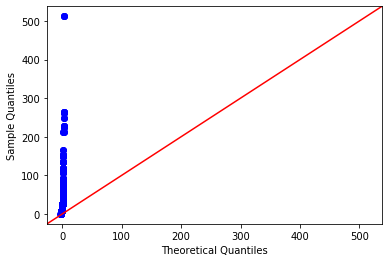

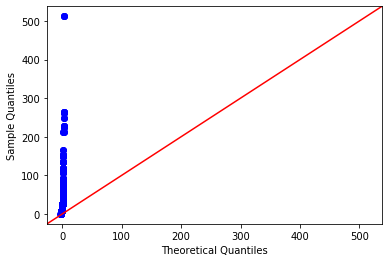

In [981]:
#method 3: Mean and Standard deviation method
#este es un metodo utilizado cuando la dstribucion de los datos es normal
# distribucion normal: simetrica (campana), moda= median= mean
#para chequear si los datos tienen distribucion normal se usa el Quantile-Quantile Plot (qqplot)

#QQ-plot plots your data’s quantiles ba the quantiles that you’d expect from a normal distribution. 
#If the distribution is normal, the plot is a straight diagonal line
#source: https://www.quora.com/How-can-I-tell-if-I-see-a-normal-distribution
import  statsmodels.api as sm
import pylab
sm.qqplot(data["Fare"], line = "45")

In [982]:
#en este caso ni de coña...

In [983]:
#pero probemos igual

In [984]:
#Method description: The Gaussian distribution has the property that the standard deviation from the mean can be used 
#to reliably summarize the percentage of values in the sample.For example, within one standard deviation of the mean will cover 68% of the data.So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then 
#all data in the sample between 45 and 55 will account for about 68% of the data sample.
#source: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/


In [985]:
#Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps
#a value of 4 standard deviations (99.9%) can be used.
#formula: upper = mean + 3*std
#lower = mean - 3*std

In [986]:
#implementamos...
low_m, up_m = np.mean(data["Fare"]) - 3 * np.std(data["Fare"]), np.mean(data["Fare"]) + 3 * np.std(data["Fare"])

In [987]:
outliers_m = data[(data["Fare"] < low_m) | (data["Fare"] > up_m)]

In [988]:
outliers_m.shape

(20, 7)

In [989]:
#se detectan 20 outliers con este metodo

In [990]:
outliers_m.loc[:, "Fare"].sort_values()

779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

In [991]:
#Metodo 4: MAD (Median absolute deviation)
#1) Calculate the median of the population, median(population)
#2) Calculate the deviation from the median, using the absolute value of the deviations, |x — median(population)|= deviation
#3) Find the median of the absolute deviations, median(|deviations|), called scaling factor
#4) Add the scaling factor to the median of the population for the upper bound, using 3 or 3.5 correction
#5) Subtract the scaling factor from the median of the population for the lower bound
#6) Anything outside of the bounds is an outlier

In [992]:
#median of the population
median_fare = np.median(data["Fare"])

In [993]:
#deviation from median
dev_med = [abs(x - median_fare ) for x in data["Fare"]]

In [994]:
#find median of dev_med
scaling_factor = np.median(dev_med)

In [995]:
#upper and lower bounds
up_v, low_v = median_fare + 3.5 * scaling_factor, median_fare - 3.5 * scaling_factor

In [996]:
#recortamos para sacar los outliers...
outliers_4 = data[(data["Fare"] < low_v) | (data["Fare"] > up_v) ]

In [997]:
outliers_4.shape

(189, 7)

In [998]:
#HANDLING THE OUTLIERS DETECTED


In [999]:
#metodo 1: Imputing with arbitrary value
#usando los outliers localizados en el metodo 1 (arbitray boundaries)...
data_recort.shape

(872, 7)

In [1000]:
#reempalzaremos todos los outliers por un valor -999
outliers_1 = data[(data["Fare"] <5) | (data["Fare"] > 300)]

In [1001]:
def arb_value(item):
    lower_1, upper_1 = 5,300
    if ((item < lower_1) | (item > upper_1)):
        item = -999         
    return item

In [1002]:

data_arb= data.copy()
data_arb["Fare"] = data_arb["Fare"].apply(arb_value) #aplicamos la funcion a cada elemento de columna fare

In [1003]:
data_arb["Fare"][258]

-999.0

In [1004]:
data["Fare"][258]

512.3292

In [1005]:
#metodo 2: Windsorization

In [1006]:
#consiste en reemplazar los datos del 10% mas extremo superior y el 10% extremo inferior por los
#valores limite de sus percentiles respectivos (tambien poede ser 5% u otro %)
#source: https://en.wikipedia.org/wiki/Winsorizing
###EJEMPLO USANDO SCIPY.STATS
import scipy.stats 


In [1007]:
y = np.array([92, 19, 67, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -58, 41])

In [1008]:
scipy.stats.mstats.winsorize(a = y, limits=[0.05, 0.05])

masked_array(data=[ 92,  19,  67,  58, 101,  91,  26,  78,  10,  13, -40,
                   101,  86,  85,  15,  89,  89,  28, -40,  41],
             mask=False,
       fill_value=999999)

In [1009]:
data_win = data.copy()

In [1010]:
#identificamos los numeros que quedaran arriba y abajo para ser ereemlazados

In [1011]:
def windsor(col, limits):
    yn = np.sort(col)
    abajo = int(limits[0] * len(yn))
    arriba = int(limits[1] * len(yn))
    th1 = int(yn[abajo])
    th2 = int(yn[- (arriba + 1)])
    for i in range(len(yn[:abajo])):
        yn[i] = th1
    for i in range(len(yn) - arriba , len(yn)):
        yn[i] = th2
    return yn


In [1012]:
data_wind["Fare"].describe()

count    891.000000
mean      25.496623
std       23.209190
min        7.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       77.000000
Name: Fare, dtype: float64

In [1013]:
data_wind["Fare"] = windsor(col = data_wind["Fare"], limits = (0.1, 0.1))

In [1014]:
data_wind["Fare"][:10] # solo una muestra porque gasta el valor 89 se reemplza por abajo

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
7    7.0
8    7.0
9    7.0
Name: Fare, dtype: float64

In [1015]:
#metodo 3: chanchamente deshacerse de los datapoints outliers..
#tomamos cualquier caso de los de arriba
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, )
data_disc = data.copy()

In [1016]:
#ejemplo; valores de Fare sore 300 y bajo 5 
data_disc = data[(data["Fare"] > 5) & (data["Fare"] < 300)]

In [1017]:
data_disc.max()

Survived       1
Pclass         3
Sex         male
Age           80
SibSp          8
Fare         263
dtype: object

In [1018]:
####SIMBOLO OR EN MAC: ALT + 1 

In [1019]:
data_disc.describe()

,Survived,Pclass,Age,SibSp,Fare
count,871.000000,871.000000,702.000000,871.000000,871.000000
mean,0.388060,2.320321,29.629872,0.535017,31.168713
std,0.487588,0.832963,14.600828,1.112459,41.359280
min,0.000000,1.000000,0.420000,0.000000,6.237500
25%,0.000000,2.000000,20.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,263.000000


In [1020]:
#metodo 3: replace the outliers with mean, median or mode

In [1021]:
promedio_fare= data["Fare"].mean()

In [1022]:
#reemplazaremos todos los que estan fuera de rango con promedio...

In [1023]:
data_r = data.copy()

In [1024]:
data_r.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [1025]:
promedio_fare= data["Fare"].mean()

In [1026]:
promedio_fare

32.204207968574636

In [1027]:
data_r.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [1028]:
#df['my_channel'].mask(df['my_channel'] > 20000, 0, inplace=True)
data_r['Fare'].mask(cond = (data_r["Fare"] <5) | (data_r["Fare"] > 300), other = promedio_fare, inplace=True)
###MASK PERMITE REEMPLAZAR LOS VALORES QUE COMPLAN CON CONDICION COND ASIGNANDOLES EL VALOR OTHER



In [1029]:
data_r["Fare"][258]

32.204207968574636

###############

####2.3 RARE VALUES

In [1030]:
#Definicion: son aquellas variables categoricas que muestran algunos valores que aparecen muy esporadicamente

In [1031]:
#en casos como deteccion de fraudes pueden ser muy valiosos

In [1032]:
#why rare values matter??
#can cause overfitting
#if they are n the training set and not in test set it will overfit train set
#if they are in test set and not in train set the model will not know what to do with it

In [1079]:
#Recipe:
#two methods: - mode imputation or create a new category for the rares called RARE for eg
#when there's one predominant category (over 90%) in the variable: observe the relationship between that variable 
#and the target, then either discard that variable, or keep it as it was. In this case, 
#variable often is not useful for prediction as it is quasi-constant (as we will later see in Feature Selection part).
#when there's a small number of categories: keep it as it was. Because only few categories are unlikely 
#to bring so much noise.
#when there's high cardinality: try the 2 methods above. But it does not guarantee 
#better results than original variable.

In [1080]:
#load dataset

In [1081]:
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols)

In [1082]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [1083]:
#analicemos antes la proporcion de cada clase en cada variable
data["Pclass"].value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [1084]:
data["SibSp"].value_counts(normalize= True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [1085]:
#SibSp tiene valores 3,5 y 8 que aparecen menos del 2% de las veces

In [1086]:
#trataremos Sibsp, ya que con Pclass tenemos solo 3 clases y ninguna tiene una predominancia de 90% o algo asi

In [1087]:
#Metodo 1: replace the clases with the mode

In [1088]:
data_rare1 = data.copy()

In [1089]:
data_rare1.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [1090]:
#claramente mode es clase 0
#usaremos mask
data_rare1["SibSp"].mask(cond = (data_rare1["SibSp"] == 3) | (data_rare1["SibSp"] == 5) |
                          (data_rare1["SibSp"] == 8), other = 0, inplace = True  )

In [1075]:
data_rare1["SibSp"].value_counts()

0    636
1    209
2     28
4     18
Name: SibSp, dtype: int64

In [1091]:
#metodo 2: create a new category for the rare...

In [1092]:
# De nuevo no tocamos a la variable Pclass, sino solo a SibSp

In [1093]:
dr = data.copy()

In [1094]:
dr.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [1095]:
#creamos la variable para las clases 3,5 y 8

In [1101]:
dr["SibSp"].mask(cond =  (dr["SibSp"] == 3) | (dr["SibSp"] == 5) |
                          (dr["SibSp"] == 8), other= "RARE", inplace = True)

In [1102]:
dr["SibSp"].value_counts()

0       608
1       209
RARE     28
2        28
4        18
Name: SibSp, dtype: int64

In [1104]:
#2.4 HIGH CARDINALITY: high number of categories in a variable

In [1105]:
#methods:
#create a new category to regroup labels with low ocurrence
#grouping labels with business understanding
#grouping labels with a desision tree

In [1106]:

######PROXIMA: FEATURE ENGINEERING